In [2]:
%pylab inline
from simulation import *
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os
import multiprocessing
num_cores = multiprocessing.cpu_count() - 1


Populating the interactive namespace from numpy and matplotlib


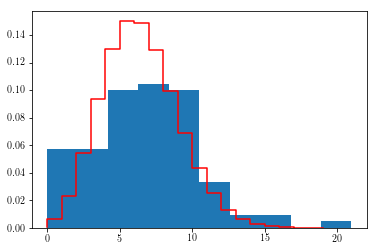

In [3]:
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]

n_ft = [len(l) for l in Lebron_FT]
poisson_mean = np.mean(n_ft)
x = np.arange(20)
g1 = poisson.pmf(x,poisson_mean)

plt.hist(n_ft, normed=True, bins=10)
plt.step(x,g1,color="red")

In [3]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)

In [4]:
trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)

In [5]:
def sim_one():
    trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

def sim_zero():
    trajectories, _ = simulate_freethrows(bron_0[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

In [6]:
n_sims = 10000

results_1 =  Parallel(n_jobs=num_cores)(delayed(sim_one)() for k in range(n_sims))  
results_1[0]

{'AIC': {0: 763.1791706727563,
  1: 755.89652849523554,
  2: 758.00505237147138,
  3: 769.52482683260348},
 'DIC1': {0: 763.17360428195491,
  1: 755.82830492488176,
  2: 757.5319778627678,
  3: 767.42899535733147},
 'DIC2': {0: 763.1707316916951,
  1: 755.80330611369334,
  2: 757.72495144738662,
  3: 770.09461237062044},
 'LOO': {0: 762.89025579634381,
  1: 755.41935601119212,
  2: 757.58145981921939,
  3: 768.43823980433433},
 'LPD': {0: 760.48651383720789,
  1: 747.82327341280575,
  2: 739.20417474104624,
  3: 730.0459491539342},
 'LPPD': {0: 761.48046064820028,
  1: 750.39491626621373,
  2: 744.56705901951057,
  3: 742.12240991192823},
 'LPPDCV2': {0: 761.89531706714706,
  1: 756.42798941763772,
  2: 780.53881204241713,
  3: 786.83459357319543},
 'WAIC1': {0: 762.87320857622217,
  1: 755.34411105105039,
  2: 757.1889791826278,
  3: 767.00267966913577},
 'WAIC2': {0: 762.89001449734417,
  1: 755.41772552210136,
  2: 757.55603781642583,
  3: 768.24629563262545},
 'kDIC1': {0: 0.996769

In [7]:
results_0 = Parallel(n_jobs=num_cores)(delayed(sim_zero)() for k in range(n_sims))  
results_0[20]

{'AIC': {0: 802.93269308941149,
  1: 804.42855322776131,
  2: 808.72492552693518,
  3: 817.72423578348014},
 'DIC1': {0: 802.92741472280704,
  1: 804.36147468644629,
  2: 808.36609242376562,
  3: 815.75270815877047},
 'DIC2': {0: 802.92442158509471,
  1: 804.33908594667093,
  2: 808.17874473412962,
  3: 815.90270193689184},
 'LOO': {0: 802.73335524906088,
  1: 804.13312677992394,
  2: 808.50491119994774,
  3: 816.57399904436704},
 'LPD': {0: 800.24000826547763,
  1: 796.355232997401,
  2: 789.90559603728207,
  3: 777.56623788558727},
 'LPPD': {0: 801.14616115818262,
  1: 798.75018644822296,
  2: 794.97081789675656,
  3: 789.01751959490684},
 'LPPDCV2': {0: 803.96530900559401,
  1: 810.56916744633384,
  2: 812.28219960993977,
  3: 819.30023658412767},
 'WAIC1': {0: 802.71470501878593,
  1: 804.05453058330784,
  2: 808.17414338441665,
  3: 815.13818310929537},
 'WAIC2': {0: 802.73309500225491,
  1: 804.13166038082068,
  2: 808.49219242317713,
  3: 816.38170655869237},
 'kDIC1': {0: 0.996

In [8]:
import pickle, gzip

with gzip.open('../../freethrow_sims.gz','wb') as f:
    pickle.dump([results_0,results_1],f)

In [9]:
trajectories, _ = simulate_freethrows(bron_0[0],poisson_mean, 91)

In [10]:
np.mean([len(l) for l in trajectories])

6.615384615384615

In [11]:
np.mean([len(l) for l in Lebron_FT])

6.9299999999999997

In [4]:
poisson_mean

6.9299999999999997